(0, 0, 255, 15)
(257, 0, 512, 15)
(514, 0, 769, 15)
(771, 0, 1026, 15)
(1028, 0, 1283, 15)
(1285, 0, 1540, 15)
(1542, 0, 1798, 15)


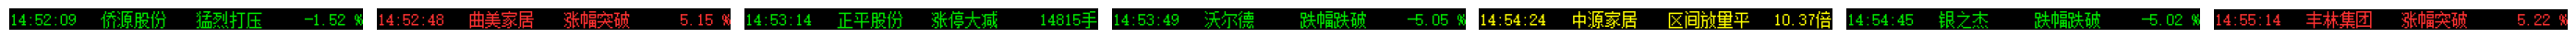

In [90]:
import matplotlib.pyplot as plt
from PIL import Image

# 读取原始图片
image_path = '/Users/lizhicq/GitHub/aotian2/data/raw_screenshots/window_screenshot2.png'  # 替换为实际图片路径
image = Image.open(image_path)

# 定义需要裁剪掉的上下左右边距
left_margin = 10   # 左侧裁剪10像素
top_margin = 50    # 上方裁剪20像素
right_margin = 0  # 右侧裁剪30像素
bottom_margin = 0 # 底部裁剪40像素

# 对图片进行初步裁剪，去除上下左右的边
image_cropped = image.crop((
    left_margin,
    top_margin,
    image.width - right_margin,
    image.height - bottom_margin
))

# 定义锚点列表 (left, top, right, bottom) 相对于裁剪后的图像坐标系
anchors = [
    #(000, 0, 256, 15),#(left, top, right, bottom)
    (257, 0, 513, 15),
    #(514, 0, 769, 15),
    #(770, 0, 1026, 15),
    (1027, 0, 1282, 15),
    #(256, 0, 512, 15),
    #(256, 0, 512, 15),
]

anchors = []

for i in range(7):
    left, top, right, bottom = i * 256 + i, 0, (i+1)*256 + i-1, 15
    right = (i+1)*256 + i if i== 6 else right
    print((left, top, right, bottom))
    anchors.append((left, top, right, bottom))

# 使用 map 对已裁剪的图片分割为子图
sub_images = list(map(image_cropped.crop, anchors))

# 绘制子图
fig, axes = plt.subplots(1, len(sub_images), figsize=(len(sub_images)*4, 4))  
# 将 figsize 增大一些，例如每张子图增加到3英寸宽

if len(sub_images) == 1:
    # 如果只有一个子图
    axes.imshow(sub_images[0])
    axes.axis('off')
else:
    # 使用 map 来展示每个子图而不是显式 for 循环
    def show_img(ax_img):
        ax, img = ax_img
        ax.imshow(img)
        ax.axis('off')
    _ = list(map(show_img, zip(axes, sub_images)))

plt.tight_layout()
plt.show()


In [84]:
image.size

(1816, 1079)

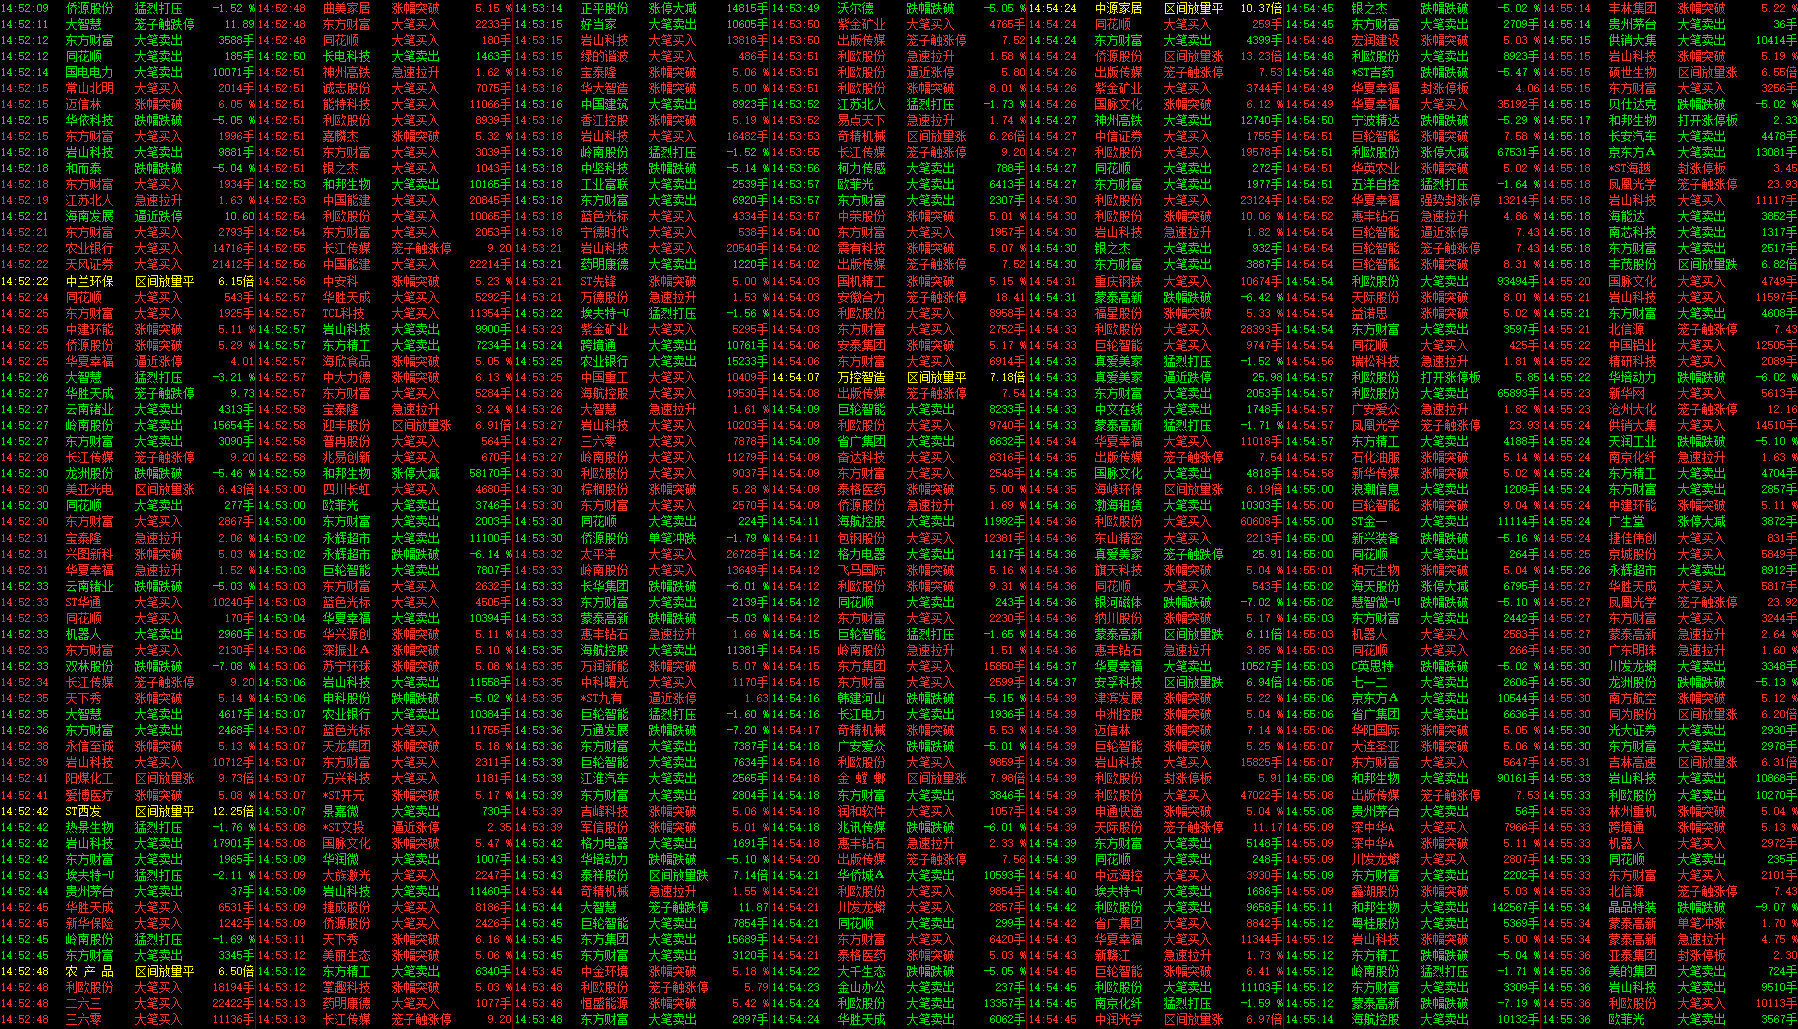

In [88]:
from IPython.display import display

# 定义需要裁剪掉的上下左右边距
left_margin = 10   # 左侧裁剪10像素
top_margin = 50   # 上方裁剪20像素
right_margin = 8  # 右侧裁剪30像素
bottom_margin = 0 # 底部裁剪40像素

image_cropped = image.crop((
    left_margin,
    top_margin,
    image.width - right_margin,
    image.height - bottom_margin
))

display(image_cropped)


In [89]:
image_cropped.size

(1798, 1029)

In [77]:
7*256+1

1793